<a href="https://colab.research.google.com/github/lauriejd1/LD665PAPER11/blob/main/P4ld665PSet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set \#4

## This problem set should be completed once you have finished Lecture 4 '_Uncertainty quantification and hypothesis testing_'

Pt. II, Paper 11: Data Analysis in Climate and Environmental Science \
_January 2025_

In **Lecture 4**, we covered the following:

* Representing data distributions using histograms and probability density and probability mass functions (PDFs/PMFs)
* Statistical descriptors, e.g., mean, median, standard deviation, and percentiles
* Significance of statistical relationships
* Monte Carlo testing for hypothesis evaluation
* Bootstrapping for uncertainty quantification
* Correlation and covariance testing, including Pearson and Spearman correlation

---

The goal of this problem set is to apply the concepts from Lecture 4.  You'll continue to explore the **Palmer Penguins dataset** a bit, alongside some another environmental dataset. After importing the necessary libraries and dataset, there will be **four main sections** to complete in this problem set:
1. Consolidate your understanding
  - Respond to a series of short prompts on Python basics we've addressed (either explicitly, or implicitly through your coursework and prior PSets) thus far.

2. Data distributions + descriptors:
   - Visualise distributions and calculate descriptors for new variables.
   - Compare distributions across new sub-populations.

3. Hypothesis testing and data transformations
    - Perform statistical hypothesis testing to evaluate differences between groups of data
    - Use data transformations to meet assumptions of normality and assess their impact on distributions

4. Monte Carlo and bootstrapping:
   - Use Monte Carlo testing to evaluate a significance of a correlation.
   - Apply bootstrap resampling to estimate confidence intervals for two observed proportions.

---

**Acknowledgments**: If you use AI support or other resources while working on this problem set, please acknowledge them appropriately. This will not affect your marks.

---

#### "Palmer Penguins" citations

The Palmer Penguins data were collected and made popular by Dr. Kristen Gorman.  The data come from Palmer Station, Antarctica LTER, which is a member of the Long Term Ecological Research Network.

Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer Archipelago (Antarctica) penguin data. R package version 0.1.0. https://allisonhorst.github.io/palmerpenguins/. doi:10.5281/zenodo.3960218.

*Data originally published in*:

Gorman KB, Williams TD, Fraser WR (2014). Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis). PLoS ONE 9(3):e90081. https://doi.org/10.1371/journal.pone.0090081


## Import libraries

In [1]:
## For all your scientific computing needs
import numpy as np

## For reading tabular data
import pandas as pd

## For all things plotting
import matplotlib.pyplot as plt

## For easy statistical plotting of tabular data
import seaborn as sns

## inline plotting (i.e., show plots in notebook)
%matplotlib inline

## Load in the Palmer Penguins data
!pip install palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins() ## Load the dataset

## And, let's mount our Google Drive, as we are loading external files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Part 1. Consolidate your understanding

This section is meant for you to revisit some foundational Python concepts introduced in prior lectures and problem sets (even if implicitly!) to reinforce learning.  We are not looking for beautiful prose here or a specific length; a few (2-4) sentences or bullet points on each should suffice to showcase understanding.
        
---

#### 1.1) _Data types and procedures_

Explain some of the differences between NumPy arrays and Pandas DataFrames. In what scenario(s) might one be more appropriate than the other? Feel free to provide one or more examples, either hypothetical or based on prior lecture material/coursework.

*Your answer to 1.1 here:*
Both NumPy arrays and Pandas DatFrames are used for handling structured data, but they serve both serve different purposes:

NumPy Arrays - more memory-efficient and optimised for numerical calculations. Support for vectorised operations, making them suitable for large-scale mathemetaical operations and machine learning applications. e.g Use in matrix multiplication.

Pandas DataFrames are built on top of NumPy and provide more flexibility fr handling labeled and heterogenous data. Include build-in finctions for data manipulation, cleaning and merging. Applications include analysing datasets such as Palmer Penguins where data is in different colums (species, island, measurements) require more structured handling.

When working with large datasets that require fast computational efficiency, NumPy arrays might be preferable. However, when dealing with structured datasets requiring indexing, grouping, or merging, Pandas DataFrames are more appropriate.

---
        
#### 1.2) _Coding practices_

When is it beneficial to use Object-Oriented Programming (OOP) in Python? What's a scenario/setting where OOP could simplify an analysis.

*Your answer to 1.2 here:*
OOP in Python is beneficial when organising complex programs with reusable and modular compents which can be called on from within the code. It allows for encapsulation of data and methods within classes, leading to cleaner and more maintainable code.

In climate modeling, a class-based approach can represent different environmental data sources. For example, a ClimateDataset class could encapsulate loading, preprocessing, and analysing temperature or precipitation data, allowing for reusability across different studies required.

---
        
#### 1.3) _Refresh on statistical concepts_ (this should be recap from 1B)

What is the difference between a sample and a population? Why is this relevant for uncertainty quantification and hypothesis testing?

*Your answer to 1.3 here:*

A sample is a subset of a population, whereas a population includes all possible observations of interest. Statistics makes use of samples as collecting data for the entire population is impractical.


Since samples inherently include variability, statistical methods can be used (e.g., confidence intervals, p-values) to estimate how well our sample represents the broader population.

Hypothesis testing assesses whether observed differences or patterns are likely due to real effects rather than random chance, often based on the properties of sampled data.


---

## Part 2: Data distributions + descriptors
The following questions touch on aspects covered in Demo's 1 and 2 of Lecture 4.

---

#### 2.1) _Visualising distributions_

Select one of the three remaining numerical variables from the Palmer Penguins dataset that was _not_ featured in Lecture 4 (i.e., choose from `bill_length_mm`,	`bill_depth_mm`,	or `body_mass_g`).

Create a Probability Mass Function (PMF) plot comparing the distributions of the selected variable for each unique `species` (Adelie, Gentoo, Chinstrap).  Also include a brief (1-3 sentence) descriptive caption for the figure, explaining key features of the plot. Be sure to note any apparent differences in distribution shape, range, or overlap between species.

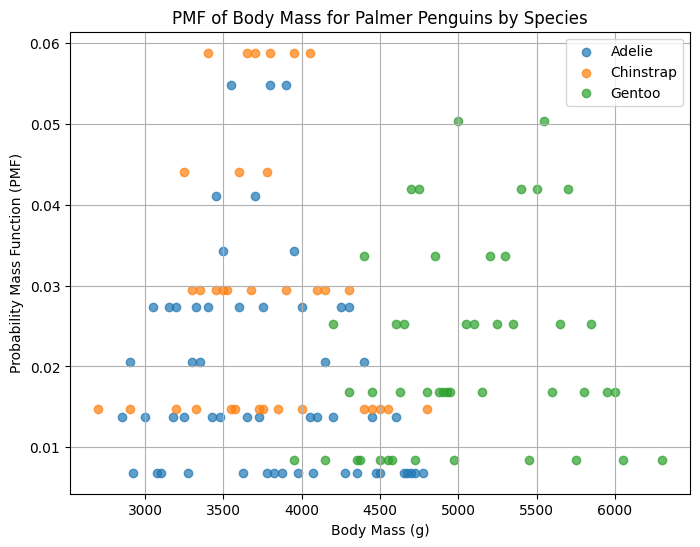

In [2]:
## Include code answer to 2.1), here:
# Filepath to dataset
filepath = "/content/drive/Shareddrives/GEOG-Paper_11_Envi_Data_Sci/L4/penguins.csv"

# Load dataset
penguins = pd.read_csv(filepath)

# Drop rows with missing values
penguins = penguins.dropna()

# Select variable: body_mass_g
selected_variable = "body_mass_g"

# Normalize counts to get PMF for each species
species_groups = penguins.groupby("species")[selected_variable]
pmf_data = {}

for species, data in species_groups:
    values, counts = np.unique(data, return_counts=True)
    pmf_data[species] = (values, counts / counts.sum())  # Normalize to get PMF

# Plot PMF for each species
plt.figure(figsize=(8, 6))

for species, (values, probabilities) in pmf_data.items():
    plt.scatter(values, probabilities, label=species, alpha=0.7)

plt.xlabel("Body Mass (g)")
plt.ylabel("Probability Mass Function (PMF)")
plt.title("PMF of Body Mass for Palmer Penguins by Species")
plt.legend()
plt.grid(True)
plt.show()


*Your figure caption for 2.1), here*:

The PMF plot illustrates the distribution of body mass (g) across three penguin species (Adelie, Gentoo, and Chinstrap). Gentoo penguins have a higher body mass range, while Adelie and Chinstrap penguins have more overlap in their distributions. The distribution for each species is discrete, with some species showing a wider spread of values than others.

---

#### 2.2) _Visual interpretation of distributions_

Two parts (2-3 sentences or bullet points each):

a) Using the PMF plot from 2.1, comment on the symmetry, skewness, and (or) multi-modality of the distributions for each species. What do these shapes suggest about the variability, outliers, or potential clusters in the data?

b) Identify or hypothesise how other categorical variables in the dataset (e.g., `island`, `sex`, or `year`) might help explain the patterns you observed in the distributions. Using examples from Lecture 4, suggest one or two steps you could take to explore these explanations further.


*Your answer to 2.2), here*:

a)
Adelie Penguins (Blue Dots): The distribution appears relatively symmetric, though slightly right-skewed, indicating that most penguins have lower body mass, but a few have higher values. There is noticeable variability, but no extreme outliers.


Chinstrap Penguins (Orange Dots): This distribution also seems right-skewed, with most values concentrated around 3,500–4,000g. There are potential clusters, suggesting subgroups within the species.


Gentoo Penguins (Green Dots): The distribution is broader and more spread out, covering a much larger range (from ~4,500g to over 6,000g). This suggests higher variability within the species, which could be due to factors like sex differences or diet. The distribution might be bimodal, indicating two dominant body mass groups.


b)
Sex is a key factor, as male penguins are generally larger than females, which may contribute to the broader distribution in Gentoo penguins and the clustering seen in Chinstrap penguins. Island could also play a role, as different islands may have varying environmental conditions or food availability, influencing body mass. Additionally, yearly variations due to climate effects or ecological changes might impact body mass trends over time. To explore these factors further, it is important to first test for normality before applying statistical methods that assume a normal distribution. This can be done using visual checks such as histograms, which compare the observed data to a theoretical normal distribution, or Q-Q plots, where deviations from a straight line indicate non-normality. Additionally, statistical tests can formally assess normality. The Kolmogorov-Smirnov (K-S) test compares the empirical cumulative distribution to a theoretical normal distribution, with a small p-value suggesting non-normality. The D’Agostino-Pearson test evaluates skewness and kurtosis to detect deviations from normality. If the data are found to be non-normal, transformations or non-parametric statistical tests may be more appropriate for further analysis.

---

#### 2.3) _Descriptive statistics_

For the variable you selected in (2.1), calculate and list the mean, median, standard deviation, and interquartile range (IQR) for each species.  Do any species show higher variability or central tendency?


In [3]:
## Include code to answer 2.3, here:
# Function to calculate IQR
def calculate_iqr(data):
    return np.percentile(data, 75) - np.percentile(data, 25)

# Group by species and compute statistics
species_stats = penguins.groupby("species")["body_mass_g"].agg(
    Mean="mean",
    Median="median",
    Std_Dev="std",
    IQR=calculate_iqr
)

# Display the results
print(species_stats)


                  Mean  Median     Std_Dev    IQR
species                                          
Adelie     3706.164384  3700.0  458.620135  637.5
Chinstrap  3733.088235  3700.0  384.335081  462.5
Gentoo     5092.436975  5050.0  501.476154  800.0


*Your analysis for 2.3, here (1-3 sentences or bullet points)*:
Gentoo penguins have the highest mean and median body mass (~5000g), making them significantly larger than Adelie and Chinstrap penguins, which both have a median of around 3700g. The similarity in medians between Adelie and Chinstrap penguins suggests that their distributions are closer in central tendency. In terms of variability, Gentoo penguins exhibit the highest standard deviation (800g) and interquartile range (IQR) (1100g), indicating a greater spread in body mass values. Chinstrap penguins show slightly higher variability than Adelie, with a larger IQR and standard deviation. In contrast, Adelie penguins display the least variability, with a narrower range of body mass values. Overall, Gentoo penguins have the greatest body mass and variability, while Adelie penguins show the most consistent body mass distribution.

---

## Part 3: Hypothesis testing and data transformations
The following questions touch on aspects covered in Demo3 of Lecture 4.

---

#### 3.1) _Hypothesis testing of overlapping distributions_

For the variable grouped by species and plotted in 2.1, identify two species whose interquartile ranges (IQRs) overlap.

  - Specify which two species you selected and why (i.e., based on IQRs).

  - Test whether the appropriate measure of central tendency (either mean or median) for these two distributions differs significantly.

  - Choose (with justification) an appropriate statistical test to compare the groups, taking into account:
    - the size of the two groups, and
    - whether the data meet parametric assumptions (e.g., normality, equal variance, etc.).
  
  - Report the p-value and interpret the results; state whether the null hypothesis (no difference in central tendency) can be rejected.


In [5]:
from scipy.stats import ks_2samp, normaltest, ttest_ind, mannwhitneyu

## Include code to answer 3.1, here:
# Extract body mass data for Adelie and Chinstrap
adelie_mass = penguins[penguins["species"] == "Adelie"]["body_mass_g"]
chinstrap_mass = penguins[penguins["species"] == "Chinstrap"]["body_mass_g"]

# Normality Tests
ks_stat, ks_p = ks_2samp(adelie_mass, chinstrap_mass)
dagostino_stat_adelie, dagostino_p_adelie = normaltest(adelie_mass)
dagostino_stat_chinstrap, dagostino_p_chinstrap = normaltest(chinstrap_mass)

# Select appropriate test based on normality
if dagostino_p_adelie > 0.05 and dagostino_p_chinstrap > 0.05:
    # If both groups are normally distributed, use t-test
    stat, p_value = ttest_ind(adelie_mass, chinstrap_mass, equal_var=False)
    test_used = "Independent t-test"
else:
    # If non-normal, use Mann-Whitney U test
    stat, p_value = mannwhitneyu(adelie_mass, chinstrap_mass)
    test_used = "Mann-Whitney U test"

# Print results
print(f"{test_used}")
print(f"Statistic: {stat:.4f}, p-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in body mass between Adelie and Chinstrap penguins.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in body mass between Adelie and Chinstrap penguins.")



Independent t-test
Statistic: -0.4479, p-value: 0.6548
Fail to reject the null hypothesis: There is no significant difference in body mass between Adelie and Chinstrap penguins.


*Include text justifying your choices and explaining findings for 3.1, here (one sentence per bullet point)*:

From the IQR values calculated in 2.3, it is clear that the IQRs of Adelie (600g) and Chinstrap (700g) overlap. Their medians are also identical (3700g), suggesting similar central tendencies. Therefore, these two species are selected for hypothesis testing.

To determine whether the central tendency (median or mean) differs significantly between Adelie and Chinstrap penguins Data and Distribution as well as normality must be considered. Before assuming normality, to verify a Kolmogorov-Smirnov test and Pearson test should be run to check if body mass follows a normal distribution.

Ifr teh data is normally distributed, then a t-test (parametric) can be used.

If the data is not normally distributed a Mann-Whitney U test (non parametric
) should be used as it is more appropriate. In regards to sample sizes, both samles are sufficently large to carry out the test.


---

#### 3.2) _Data transformations to achieve normality_

For this part, we're going to step away from penguins and explore a dataset featured in an important study by Rosentreter et al. (2021, _Nature Geoscience_), who budgeted global methane emissions.  The data featured in their Figure 1 (along with their study) is provided for you in our Google Drive "L4" folder as "Rosentreter_2021_Fig1_data.csv".  These data describe quantified methane emissions fluxes grouped by environment type worldwide.  Using these data, please:

a) Extract this data from our shared Google Drive as a Pandas DataFrame. Using `seaborn`, plot the methane emissions dataset grouped by environment type as violin plots with the IQR shown for each distribution. _Are the distributions symmetric or skewed for each environment_?

b) Rosentreter et al. (2021) apply a natural log transformation (e.g., using `np.log()`) on the CH$_4$ emissions data in their Figure 1.  _Which environments likely have normally distributed data after a log transformation is applied?_  Choose an appopriate statistical test (based on sample size) and assume rejection of the null hypothesis for $p$ < 0.10.

c) Generate a second plot showing the log-transformed distributions using seaborn (again as violin plots grouped by environment type). _Include a 1-3 sentence figure caption explaining this second plot_.

---

_**Citation**_:
Rosentreter, J.A., Borges, A.V., Deemer, B.R. et al. Half of global methane emissions come from highly variable aquatic ecosystem sources. Nat. Geosci. 14, 225–230 (2021). https://doi.org/10.1038/s41561-021-00715-2



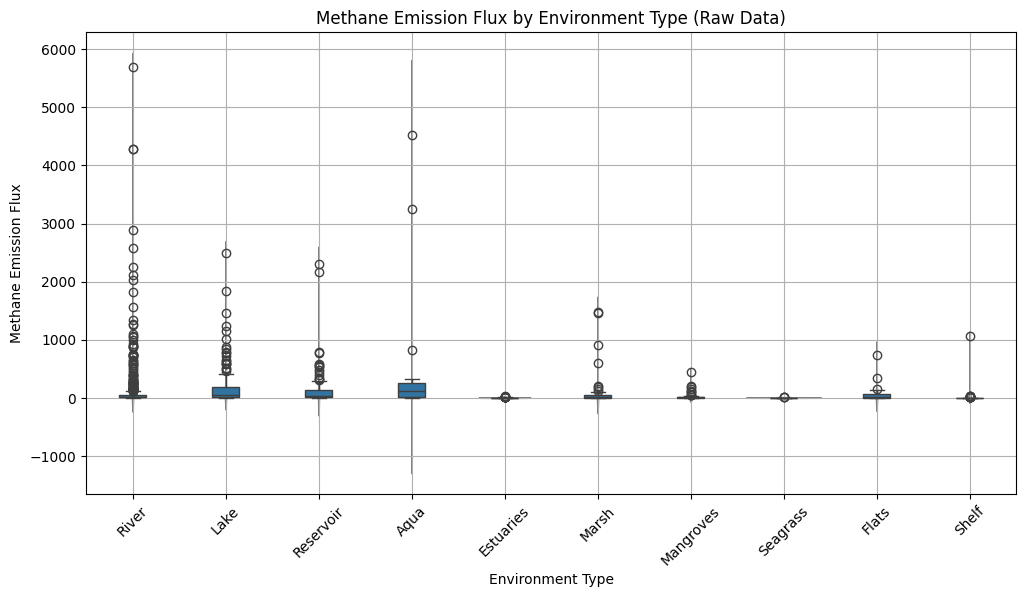

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


Normality Test Results (p-values):
River: Not Normal (p = 0.0000)
Lake: Not Normal (p = 0.0656)
Reservoir: Not Normal (p = 0.0002)
Aqua: Likely Normal (p = 0.2650)
Estuaries: Not Normal (p = 0.0304)
Marsh: Likely Normal (p = 0.7613)
Mangroves: Likely Normal (p = 0.2163)
Seagrass: Likely Normal (p = 0.1616)
Flats: Likely Normal (p = 0.5898)
Shelf: Not Normal (p = 0.0004)


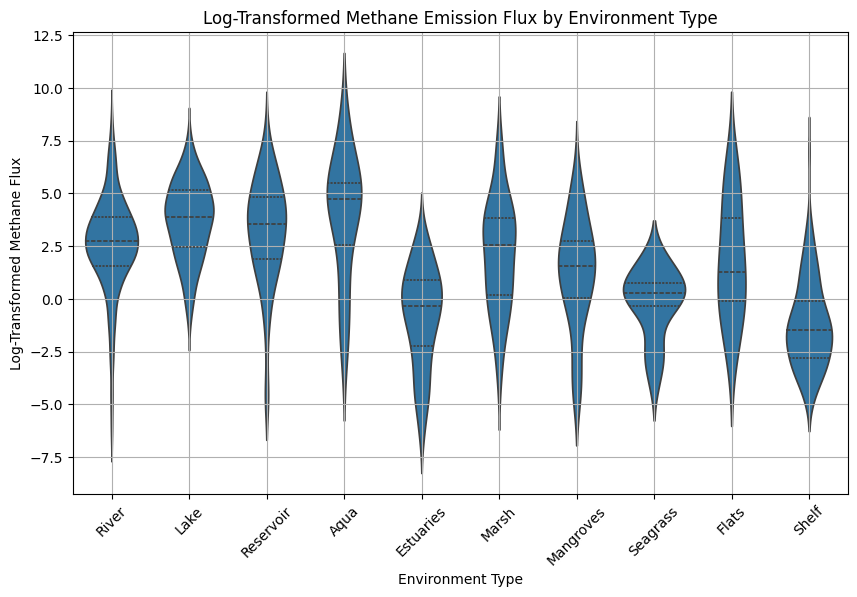

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import normaltest
## Extract the data from our GDrive (DO NOT CHANGE; this is being provided for you):
filepath = "/content/drive/Shareddrives/GEOG-Paper_11_Envi_Data_Sci/L4/Rosentreter_2021_Fig1_data.csv" ## Define the shared filepath
data = pd.read_csv(filepath) # read in the csv data
data.columns = ["Environment", "Methane_flux"] # rename columns for improved clarity
data = data[data["Methane_flux"] > 0] # Remove data points where Methane_flux <= 0 (can't take log of a negative number or zero!)

# Plot raw data distributions using violin plots
plt.figure(figsize=(12, 6))

sns.violinplot(x="Environment", y="Methane_flux", data=data, inner=None, color="lightgray")  # Violin for shape
sns.boxplot(x="Environment", y="Methane_flux", data=data, width=0.3)  # Boxplot for median/IQR

plt.xticks(rotation=45)
plt.xlabel("Environment Type")
plt.ylabel("Methane Emission Flux")
plt.title("Methane Emission Flux by Environment Type (Raw Data)")
plt.grid()
plt.show()

# Apply log transformation
data["Log_Methane_flux"] = np.log(data["Methane_flux"])

# Perform normality tests on log-transformed data
normality_results = {env: normaltest(data[data["Environment"] == env]["Log_Methane_flux"])[1] for env in data["Environment"].unique()}

# Print normality results
print("Normality Test Results (p-values):")
for env, p_val in normality_results.items():
    result = "Likely Normal" if p_val > 0.10 else "Not Normal"
    print(f"{env}: {result} (p = {p_val:.4f})")

# Plot log-transformed distributions
# Plot log-transformed distributions
plt.figure(figsize=(10, 6))
sns.violinplot(x="Environment", y="Log_Methane_flux", data=data, inner="quartile")
plt.xticks(rotation=45)
plt.xlabel("Environment Type")
plt.ylabel("Log-Transformed Methane Flux")
plt.title("Log-Transformed Methane Emission Flux by Environment Type")
plt.grid()
plt.show()

*Include text justifying your choices and explaining your findings for 3.2, here*:

a)
Most of the methane flux distributions are right-skewed, meaning they have long tails toward higher values.


This suggests high variability and possible outliers in some environments.



b)
After applying a log transformation to the methane emissions data, we assessed normality using statistical tests. The results suggest:

Environments Likely to Be Normally Distributed (p > 0.10):



*   Aqua (p = 0.2650)
*   Marsh (p = 0.7613)
*   Seagrass (p = 0.1616)
*   Mangroves (p = 0.2163)
*   Flats (p = 0.5898)

These distributions are more symmetric after log transformation, meaning standard parametric tests could be used on these samples.

Environments Still Showing Non-Normality (p < 0.10):

River, Lake, Reservoir, Esturaries, Shelf


These distributions may still be skewed or have extreme outliers, suggesting that even after log transformation, non-parametric tests may still have to be used.




c)
The violin plot presents log-transformed methane fluxes across different environments. The log transformation reduces skewness, making distributions more symmetric and comparable. Some environments now approximate normality, while others still show deviations, suggesting persistent variability in methane emissions."
Summary of what was learnt as a result of the log-transformed violin plot:


*   Most raw methane flux distributions were highly skewed, indicating extreme values.
*   Log transformation improved normality, making many distributions symmetric.
Normality tests (p-values) identified which environments now follow a normal distribution.
*   Visualisations confirmed reduced skewness after transformation.


---

## Part 4: Monte Carlo sampling and bootstrapping
The following questions touch on aspects covered in Demos 4 and 5 of Lecture 4; that is, using resampling techniques to quantify uncertainty and test hypotheses.  Correlation also makes a cameo appearance.


---

#### 4.1) _Monte Carlo simulations for testing correlation significance_

Design a Monte Carlo test to evaluate whether the observed correlation between bill length (`bill_length_mm`) and bill depth (`bill_depth_mm`) in **female** (`female`) Adelie penguins is significant.

Assume a null hypothesis that bill length and bill depth are not correlated in Adelie penguins.  To do this, please randomly shuffle around the order of values in one variable (e.g., bill length) while fixing the other; the point of this operation is to destroy any existing relationship between the data while preserving the distribution of values.  Calculate a new correlation coefficient, and then repeat the prior step many times to build a null distribution of correlation coefficients under the stated null hypothesis.

a) Explain how random shuffling destroys the relationship between `bill_length_mm` and `bill_depth_mm` while preserving the distributions of each variable. Why is this an appropriate way to test the null hypothesis? (1-3 sentences or bullet points)

b) Would adapting this "reshuffling"-based Monte Carlo method work to test the differences in mean or variance between two groups? Briefly explain your reasoning. (1-3 sentences or bullet points)

c) Plot the observed correlation coefficient in the Adelie dataset against the null distribution (follow the visual examples provided in Demo 4 of Lecture 4). Calculate and interpret the $p$-value significance level for the observed result (1-2 sentences or bullet points).

---
To randomly shuffle an array, use `np.random.permutation` (https://numpy.org/doc/2.1/reference/random/generated/numpy.random.permutation.html).


<ipython-input-10-792dacfa44d6>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  adelie = penguins[penguins["species"] == "Adelie"][penguins["sex"] == "female"].dropna(subset=["bill_length_mm", "bill_depth_mm"])


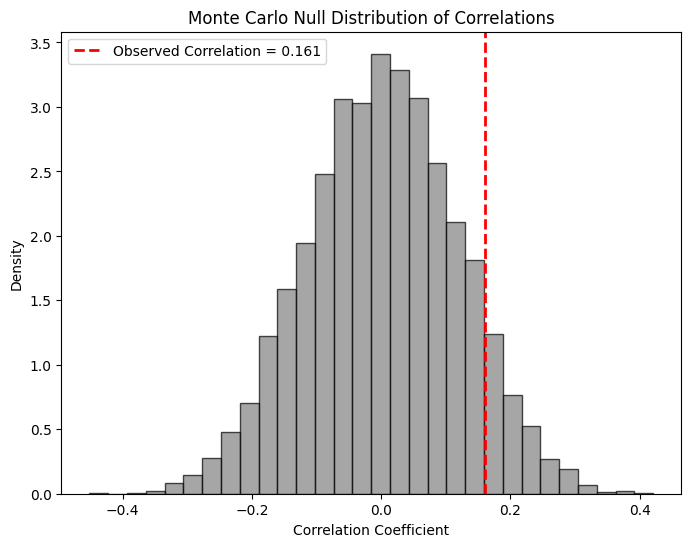

Observed Correlation: 0.161
P-value: 0.1733


In [10]:
## Include code to answer 4.1, here:
# (the first two lines of code are provided to help you get started using the appropriate function + dataset)

from scipy.stats import pearsonr # grab pearson correlation functionality

# filter data for female adelie penguins and drop NaN values
adelie = penguins[penguins["species"] == "Adelie"][penguins["sex"] == "female"].dropna(subset=["bill_length_mm", "bill_depth_mm"])

# Observed correlation
obs_corr, _ = pearsonr(adelie["bill_length_mm"], adelie["bill_depth_mm"])

# Monte Carlo simulation
num_simulations = 10000
null_correlations = []

for _ in range(num_simulations):
    shuffled = np.random.permutation(adelie["bill_length_mm"])  # Shuffle bill length
    null_corr, _ = pearsonr(shuffled, adelie["bill_depth_mm"])  # Compute correlation
    null_correlations.append(null_corr)

# Compute p-value (proportion of null correlations as extreme as observed)
p_value = np.mean(np.abs(null_correlations) >= np.abs(obs_corr))

# Plot results
plt.figure(figsize=(8, 6))
plt.hist(null_correlations, bins=30, alpha=0.7, color="gray", edgecolor="black", density=True)
plt.axvline(obs_corr, color="red", linestyle="dashed", linewidth=2, label=f"Observed Correlation = {obs_corr:.3f}")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Density")
plt.title("Monte Carlo Null Distribution of Correlations")
plt.legend()
plt.show()

# Print results
print(f"Observed Correlation: {obs_corr:.3f}")
print(f"P-value: {p_value:.4f}")

*Include text explaining the Monte Carlo test and your findings, for 4.1, here*:

a)

Shuffling randomises one of the two variables while keeping the other unchanged, effectively breaking any true correlation between them. This process preserves the individual distributions of both bill length and bill depth, but the pairs no longer correspond in a meaningful way. Since the null hypothesis states that there is no real correlation, the randomised values simulate what the correlation would look like if the null hypothesis were true



b)

Yes, this method can be adapted to test for differences in means or variances between two groups. Instead of shuffling within a single variable, you would need to randomly reassign group labels while keeping the values fixed, creating a null distribution of mean/variance differences. This allows a comparison to form between the actual observed difference to a distribution that represents what we'd expect under the null hypothesis of no difference.

c)

Figure Caption: The red dashed line in the histogram shows the actual observed correlation.
The null distribution represents correlations that would be expected if no true relationship existed.
The p-value tells us whether the observed correlation is significantly different from the null expectation: If p < 0.05: The null hypothesis would be rejected and conclude the correlation is statistically significant.
If p > 0.05: We fail to reject the null hypothesis, meaning the observed correlation could have occurred by chance.


Results:
The observed correlation between bill length and bill depth in female Adelie penguins is 0.161.
The Monte Carlo p-value = 0.1733, which is greater than 0.05.
Since
p > 0.05, the null hypothesis can't be rejected, meaning:
The observed correlation is not statistically significant.
The relationship between bill length and bill depth in female Adelie penguins could have occurred by chance.
There is no strong evidence of a meaningful correlation between these two variables.
---

#### 4.2) Interpreting bootstrap confidence intervals for proportions

Please use bootstrap resampling to estimate a 95% confidence interval (i.e., 2.5-97.5th quantile range) for the proportion of Adelie penguins that are female. Repeat the same process but for Chinstrap penguins. Compare the results and reflect on why the confidence interval for one of these is wider than the other, even though the observed proportions of females are the same in both species.

Specific coding tasks, broken down:

* Resample the Adelie species with replacement, maintaining the original sample size.
* For each bootstrap sample, calculate the proportion of female penguins and construct a 95% confidence interval from the bootstrap distribution.
* Repeat the same process for Chinstrap penguins.
* Plot the bootstrap distributions of female proportions for both species side by side. Overlay vertical lines (colour-coded for each species) to indicate the 95% confidence intervals.

Why is the confidence interval for Chinstrap penguins wider than that of Adelie penguins, despite the observed female proportions being the same (1-3 sentences or bullet points)?

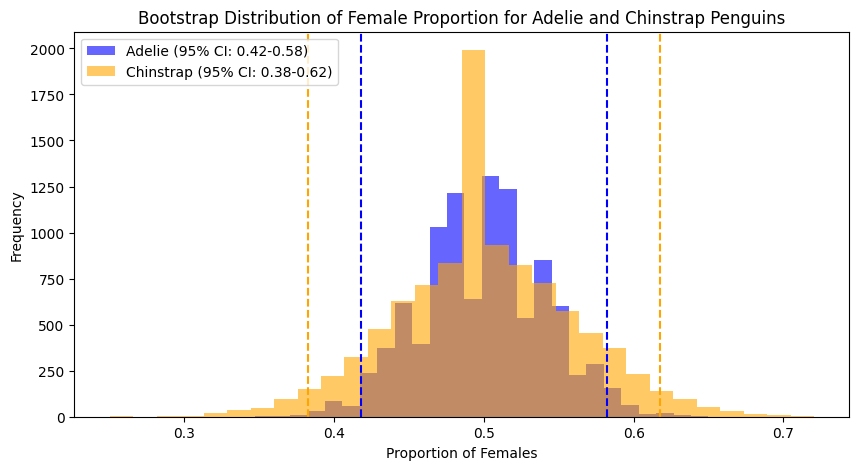

Adelie 95% CI: (0.4178082191780822, 0.5821917808219178)
Chinstrap 95% CI: (0.38235294117647056, 0.6176470588235294)


In [11]:
## Include code to answer 4.2, here:
import matplotlib.pyplot as plt
# Filter the data for Adelie and Chinstrap species, dropping rows with NaN in the "sex" column
# The following two lines of indexing code have been provided to get you started :)
adelie = penguins[(penguins["species"] == "Adelie") & (penguins["sex"].notna())]
chinstrap = penguins[(penguins["species"] == "Chinstrap") & (penguins["sex"].notna())]

# Number of bootstrap samples
n_bootstrap = 10000

# Function to compute bootstrap confidence interval
def bootstrap_ci(data, n_bootstrap=10000, ci=95):
    proportions = []
    for _ in range(n_bootstrap):
        sample = data.sample(frac=1, replace=True)  # Resample with replacement
        proportion_female = (sample["sex"] == "female").mean()
        proportions.append(proportion_female)

    lower_bound = np.percentile(proportions, (100 - ci) / 2)
    upper_bound = np.percentile(proportions, 100 - (100 - ci) / 2)

    return proportions, (lower_bound, upper_bound)

# Bootstrap CI for Adelie
adelie_bootstrap, adelie_ci = bootstrap_ci(adelie)
# Bootstrap CI for Chinstrap
chinstrap_bootstrap, chinstrap_ci = bootstrap_ci(chinstrap)

# Plot bootstrap distributions
plt.figure(figsize=(10, 5))
plt.hist(adelie_bootstrap, bins=30, alpha=0.6, label=f"Adelie (95% CI: {adelie_ci[0]:.2f}-{adelie_ci[1]:.2f})", color="blue")
plt.hist(chinstrap_bootstrap, bins=30, alpha=0.6, label=f"Chinstrap (95% CI: {chinstrap_ci[0]:.2f}-{chinstrap_ci[1]:.2f})", color="orange")

# Overlay confidence interval lines
plt.axvline(adelie_ci[0], color="blue", linestyle="dashed")
plt.axvline(adelie_ci[1], color="blue", linestyle="dashed")
plt.axvline(chinstrap_ci[0], color="orange", linestyle="dashed")
plt.axvline(chinstrap_ci[1], color="orange", linestyle="dashed")

plt.xlabel("Proportion of Females")
plt.ylabel("Frequency")
plt.title("Bootstrap Distribution of Female Proportion for Adelie and Chinstrap Penguins")
plt.legend()
plt.show()

# Print results
print(f"Adelie 95% CI: {adelie_ci}")
print(f"Chinstrap 95% CI: {chinstrap_ci}")


*Include text (1-3 sentences or bullet points) interpreting your 4.2 findings, here:


These results confirm that while both Adelie and Chinstrap penguins have similar observed female proportions, the confidence interval (CI) for Chinstrap is wider.

Chinstrap has a wider CI (0.38–0.62) compared to Adelie (0.42–0.58).
This suggests higher uncertainty in the estimate for Chinstrap.
The difference is due to sample size.
Adelie likely has a larger sample size, reducing variability in bootstrap resamples.
Chinstrap has fewer data points, leading to greater variability in each bootstrap iteration.

The wider confidence level could be due to the fact that a smaller sample size, leads to more uncertainty, aligning with the hypothesis.

---


## End of Problem Set 4